# Lec4 量子近似最適化アルゴリズム（QAOA ）
Reference
- [[Youtube]【誰でも量子コンピュータ！QAOA編】Quantum Computing for You【追加公演第4回・9/30実施】](https://www.youtube.com/watch?v=7h2mticpcFc&t)

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
from sympy.physics.quantum.qubit import matrix_to_qubit
from qiskit.visualization import plot_bloch_multivector
import numpy as np

---
#### 復習

In [2]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [3]:
qc.x(qr)
qc.z(qr)

In [4]:
qc.draw()

┌───┐┌───┐
q1: ┤ X ├┤ Z ├
    └───┘└───┘

In [5]:
def sim_state(qc, disp=True):
    sim = Aer.get_backend('statevector_simulator')
    qc = transpile(qc, backend=sim)
    res = sim.run(qc).result()
    state = res.data()['statevector']
    if disp:
        ket = matrix_to_qubit(np.array(state)[:, np.newaxis])
        print(ket)
    return state

In [6]:
state = sim_state(qc)

-1.0*|1>


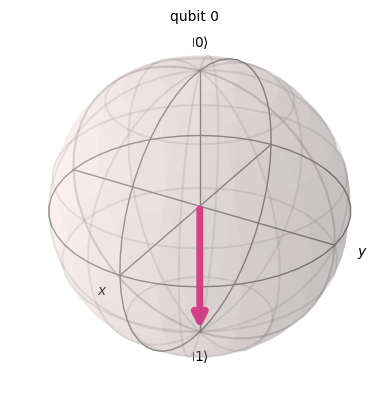

In [7]:
plot_bloch_multivector(state)

---

In [8]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [9]:
qc.h(qr)

In [10]:
qc.draw()

┌───┐
q4: ┤ H ├
    └───┘

In [11]:
state = sim_state(qc)

0.707106781186548*|0> + 0.707106781186547*|1>


In [12]:
from qiskit.visualization import plot_histogram

def sim_state_exp(qc):
    '''
    '''
    qc.measure_all()
    sim = Aer.get_backend('qasm_simulator')
    qc = transpile(qc, backend=sim)
    res = sim.run(qc).result()
    ans = res.get_counts()
    return ans

In [13]:
ans = sim_state_exp(qc)

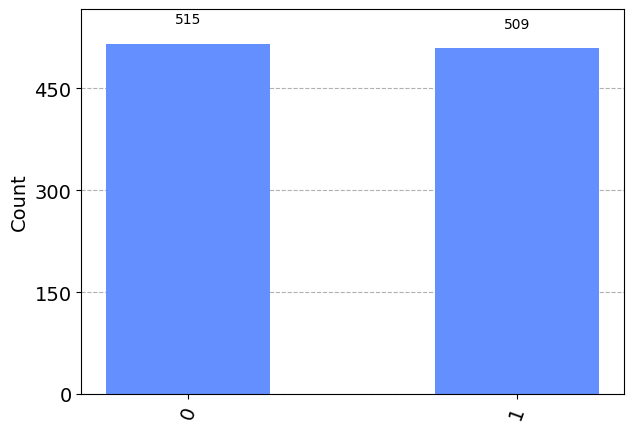

In [14]:
plot_histogram(ans)

#### 磁石の量子シミュレーション


In [15]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

$\exp{(iEt)} = \cos{Et} + i\sin{Et}$

In [16]:
# 量子力学では角度がエネルギー*時間に相当する。（Schorodinger's eqより）
theta = 0.1
Tall = 10

# 初期状態は重ね合わせの状態。これはXの固有状態なので、横磁場を掛けていれば状態を維持できる。
qc.h(qr)

# 横磁場を掛けてから縦磁場をかける操作を何度か繰り返す。
for k in range(Tall):
    # 横磁場。徐々に弱くしていく。
    qc.rx(theta*(1-k/Tall), qr)
    # 縦磁場。徐々に強くしていく。
    qc.rz(theta*(k/Tall), qr)

In [17]:
qc.draw()

┌───┐┌─────────┐┌───────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
q9: ┤ H ├┤ Rx(0.1) ├┤ Rz(0) ├┤ Rx(0.09) ├┤ Rz(0.01) ├┤ Rx(0.08) ├┤ Rz(0.02) ├»
    └───┘└─────────┘└───────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q9: ┤ Rx(0.07) ├┤ Rz(0.03) ├┤ Rx(0.06) ├┤ Rz(0.04) ├┤ Rx(0.05) ├┤ Rz(0.05) ├»
«    └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«q9: ┤ Rx(0.04) ├┤ Rz(0.06) ├┤ Rx(0.03) ├┤ Rz(0.07) ├┤ Rx(0.02) ├┤ Rz(0.08) ├»
«    └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
«    ┌──────────┐┌──────────┐
«q9: ┤ Rx(0.01) ├┤ Rz(0.09) ├
«    └──────────┘└──────────┘

In [18]:
state = sim_state(qc)

0.631540921995668*|0> - 0.342676693412097*I*|0> + 0.694636907456178*|1> - 0.0347608175498081*I*|1>


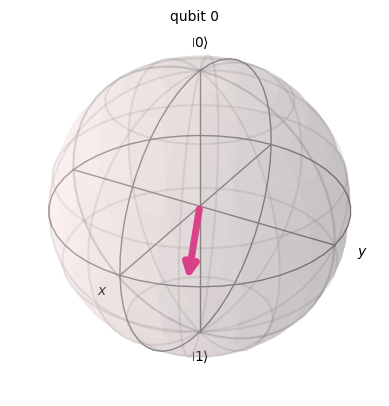

In [19]:
plot_bloch_multivector(state)

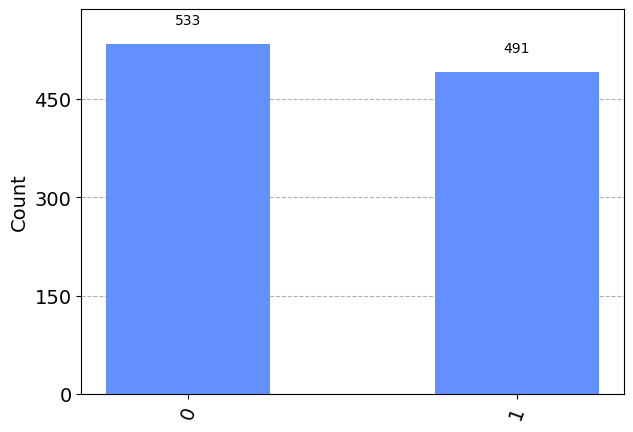

In [20]:
ans = sim_state_exp(qc)
plot_histogram(ans)

---

In [21]:
n = 2
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

$E = -\Gamma(X_1 + X_2) (1-\frac{k}{T_{all}}) - J \cdot Z_1 Z_2 \cdot \frac{k}{T_{all}}$

In [22]:
# 量子力学では角度がエネルギー*時間に相当する。（Schorodinger's eqより）
theta = 0.1
Tall = 100

# 初期状態は重ね合わせの状態。これはXの固有状態なので、横磁場を掛けていれば状態を維持できる。
qc.h(qr)

# 横磁場を掛けてから縦磁場をかける操作を何度か繰り返す。
for k in range(Tall):
    # 横磁場。徐々に弱くしていく。
    qc.rx(theta*(1-k/Tall), qr)

    # 
    qc.cx(qr[0], qr[1])
    qc.rz(theta*k/Tall, qr[1])
    qc.cx(qr[0], qr[1])
    
    # # 縦磁場。徐々に強くしていく。
    # qc.rz(theta*(k/Tall), qr)

In [23]:
qc.draw()

┌───┐┌─────────┐                   ┌───────────┐                       »
q18_0: ┤ H ├┤ Rx(0.1) ├──■─────────────■──┤ Rx(0.099) ├──■─────────────────■──»
       ├───┤├─────────┤┌─┴─┐┌───────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐»
q18_1: ┤ H ├┤ Rx(0.1) ├┤ X ├┤ Rz(0) ├┤ X ├┤ Rx(0.099) ├┤ X ├┤ Rz(0.001) ├┤ X ├»
       └───┘└─────────┘└───┘└───────┘└───┘└───────────┘└───┘└───────────┘└───┘»
«       ┌───────────┐                       ┌───────────┐                  »
«q18_0: ┤ Rx(0.098) ├──■─────────────────■──┤ Rx(0.097) ├──■───────────────»
«       ├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐»
«q18_1: ┤ Rx(0.098) ├┤ X ├┤ Rz(0.002) ├┤ X ├┤ Rx(0.097) ├┤ X ├┤ Rz(0.003) ├»
«       └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘└───────────┘»
«            ┌───────────┐                       ┌───────────┐     »
«q18_0: ──■──┤ Rx(0.096) ├──■─────────────────■──┤ Rx(0.095) ├──■──»
«       ┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐»
«q18_1: ┤ X ├┤ Rx(0.096) ├┤ X ├┤ Rz(0.004) ├┤ X ├┤ Rx(0.095) ├┤ X ├»
«       └───┘└───────────┘└───┘└───────────┘└───┘└───────────┘└───┘»
«                         ┌───────────┐                       ┌───────────┐»
«q18_0: ───────────────■──┤ Rx(0.094) ├──■─────────────────■──┤ Rx(0.093) ├»
«       ┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤»
«q18_1: ┤ Rz(0.005) ├┤ X ├┤ Rx(0.094) ├┤ X ├┤ Rz(0.006) ├┤ X ├┤ Rx(0.093) ├»
«       └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘└───────────┘»
«                              ┌───────────┐                       »
«q18_0: ──■─────────────────■──┤ Rx(0.092) ├──■─────────────────■──»
«       ┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐»
«q18_1: ┤ X ├┤ Rz(0.007) ├┤ X ├┤ Rx(0.092) ├┤ X ├┤ Rz(0.008) ├┤ X ├»
«       └───┘└───────────┘└───┘└───────────┘└───┘└───────────┘└───┘»
«       ┌───────────┐                       ┌──────────┐                      »
«q18_0: ┤ Rx(0.091) ├──■─────────────────■──┤ Rx(0.09) ├──■────────────────■──»
«       ├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├──────────┤┌─┴─┐┌──────────┐┌─┴─┐»
«q18_1: ┤ Rx(0.091) ├┤ X ├┤ Rz(0.009) ├┤ X ├┤ Rx(0.09) ├┤ X ├┤ Rz(0.01) ├┤ X ├»
«       └───────────┘└───┘└───────────┘└───┘└──────────┘└───┘└──────────┘└───┘»
«       ┌───────────┐                       ┌───────────┐                  »
«q18_0: ┤ Rx(0.089) ├──■─────────────────■──┤ Rx(0.088) ├──■───────────────»
«       ├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐»
«q18_1: ┤ Rx(0.089) ├┤ X ├┤ Rz(0.011) ├┤ X ├┤ Rx(0.088) ├┤ X ├┤ Rz(0.012) ├»
«       └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘└───────────┘»
«            ┌───────────┐                       ┌───────────┐     »
«q18_0: ──■──┤ Rx(0.087) ├──■─────────────────■──┤ Rx(0.086) ├──■──»
«       ┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐»
«q18_1: ┤ X ├┤ Rx(0.087) ├┤ X ├┤ Rz(0.013) ├┤ X ├┤ Rx(0.086) ├┤ X ├»
«       └───┘└───────────┘└───┘└───────────┘└───┘└───────────┘└───┘»
«                         ┌───────────┐                       ┌───────────┐»
«q18_0: ───────────────■──┤ Rx(0.085) ├──■─────────────────■──┤ Rx(0.084) ├»
«       ┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤»
«q18_1: ┤ Rz(0.014) ├┤ X ├┤ Rx(0.085) ├┤ X ├┤ Rz(0.015) ├┤ X ├┤ Rx(0.084) ├»
«       └───────────┘└───┘└───────────┘└───┘└───────────┘└───┘└───────────┘»
«                              ┌───────────┐                       »
«q18_0: ──■─────────────────■──┤ Rx(0.083) ├──■─────────────────■──»
«       ┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐┌─┴─┐»
«q18_1: ┤ X ├┤ Rz(0.016) ├┤ X ├┤ Rx(0.083) ├┤ X ├┤ Rz(0.017) ├┤ X ├»
«       └───┘└───────────┘└───┘└───────────┘└───┘└───────────┘└───┘»
«       ┌───────────┐                       ┌───────────┐                  »
«q18_0: ┤ Rx(0.082) ├──■─────────────────■──┤ Rx(0.081) ├──■───────────────»
«       ├───────────┤┌─┴─┐┌───────────┐┌─┴─┐├───────────┤┌─┴─┐┌───────────┐»
«q18_1: ┤ Rx(0.082) ├┤ X ├┤ Rz(0.018) ├┤ X ├┤ Rx(0.081) 

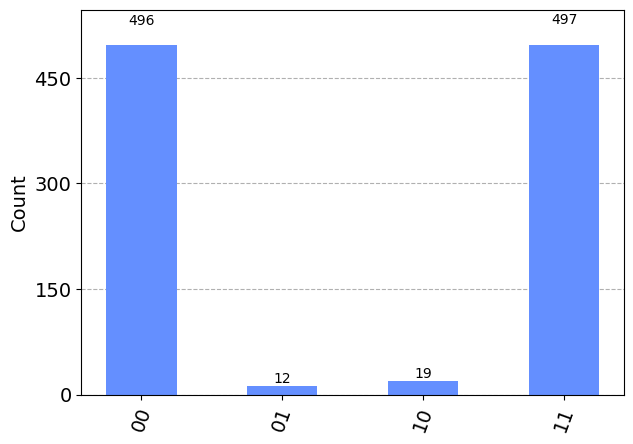

In [24]:
ans = sim_state_exp(qc)
plot_histogram(ans)

スピングラスについて。  
$E = h_{1}Z_{1} + h_{2}Z_{2} + \cdots + J_{12}Z_{1}Z_{2} + J_{23}Z_{2}Z_{3} + \cdots$  
ここで、$h = (h_{1}, h_{2}, \cdots)$は縦磁場の強さを表す係数を並べたベクトルであり、  
$J$は
$$
J = 
\begin{pmatrix}
   J_{11} & J_{12} & J_{13} & \cdots \\
   J_{21} & J_{22}                   \\
   J_{31} &        & \ddots           \\
   \vdots &  \\
\end{pmatrix}
$$
という行列を表し、$J_{ij}$スピン間の相互作用を表す。

In [25]:
def QA(J, h, s1, s2):
    """
    Args:
        J
        h
        s1:
        s2:
    """
    n = len(h)
    qc = QuantumCircuit()
    qr = QuantumRegister(n)
    qc.add_register(qr)

    # 横磁場をかける。
    qc.rx(s1, qr)

    # 縦磁場(h)をかける。
    for i in range(n):
        qc.rz(s2*h[i], qr[i])
    # 相互作用(J)
    for i in range(n):
        for j in range(n):
            if i != j:
                qc.cx(qr[i], qr[j])
                qc.rz(s2*J[i, j], qr[j])
                qc.cx(qr[i], qr[j])
    
    Uqubo = qc.to_gate()
    Uqubo.name = 'Uqubo'
    return Uqubo

In [26]:
# 三つ巴状態
n = 3
J = -np.ones(n**2).reshape(n, n)
h = np.zeros(n) # 今回は縦磁場はなし。

In [27]:
Tall = 500
dt = 0.01

qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

qc.h(qr)

for k in range(Tall):
    s1 = dt*(1 - k/Tall)
    s2 = dt*k/Tall
    Uqubo = QA(J, h, s1, s2)
    qc.append(Uqubo, qr)

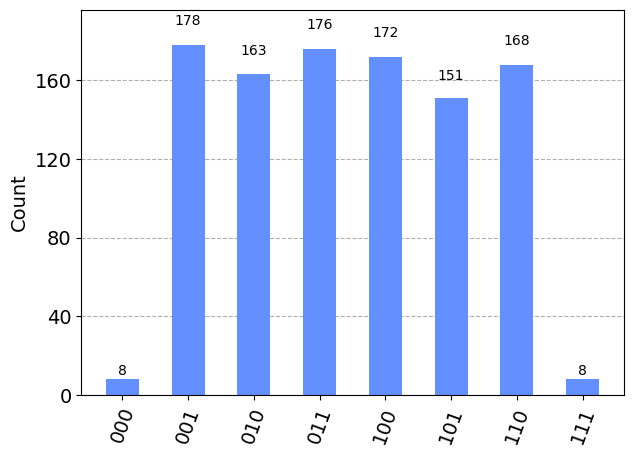

In [28]:
ans = sim_state_exp(qc)
plot_histogram(ans)

In [29]:
from qiskit.quantum_info.operators import Operator, Pauli

def ene_exp(qc, h, J):
    '''
    期待値を計算する。
    '''
    n = len(h)
    state = sim_state(qc, disp=False)
    op = Operator(np.zeros([2**n, 2**n]))
    for k in range(n):
        op_str = 'I'*k + 'Z' + 'I'*(n-1-k)
        op += -h[k]*Operator(Pauli(op_str))

    for k in range(n):
        for l in range(n):
            if k < l:
                op_str = "I" * k + "Z" + "I" * (l-k-1) + "Z" + "I" * (n-1-l)
                op += -J[k, l]*Operator(Pauli(op_str))
            elif k > l:
                op_str = "I" * l + "Z" + "I" * (k-l-1) + "Z" + "I" * (n-1-k)
                op += -J[l, k]*Operator(Pauli(op_str))
    
    y = state.expectation_value(op)
    return y, state

In [30]:
def ene_func(params):
    Tall = int(len(params)/2)
    qc = QuantumCircuit()
    qr = QuantumRegister(n)
    qc.add_register(qr)

    # 重ね合わせの状態から始める。
    qc.h(qr)

    # Bang Bang制御
    for k in range(Tall):
        s1 = params[k]
        s2 = params[k+Tall]
        Uqubo = QA(J, h, s1, s2)
        qc.append(Uqubo, qr)

    ene, _ = ene_exp(qc, h, J)
    return ene

In [31]:
Tall = 2
params = np.random.rand(2*Tall)

In [32]:
from scipy.optimize import minimize

In [33]:
result = minimize(ene_func, params, method="COBYLA", options={"maxiter": 100})

/home/user/anaconda3/envs/quantum/lib/python3.9/site-packages/scipy/optimize/_cobyla_py.py:293: ComplexWarning: Casting complex values to real discards the imaginary part
  xopt, info = cobyla.minimize(calcfc, m=m, x=np.copy(x0), rhobeg=rhobeg,


In [34]:
result.fun

-1.9999996288364639

In [35]:
result.x

array([1.02571653, 0.61532619, 1.87846063, 0.62258835])

In [36]:
params = result.x
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

qc.h(qr)

for k in range(Tall):
    s1 = params[k]
    s2 = params[k+Tall]
    Uqubo = QA(J, h, s1, s2)
    qc.append(Uqubo, qr)

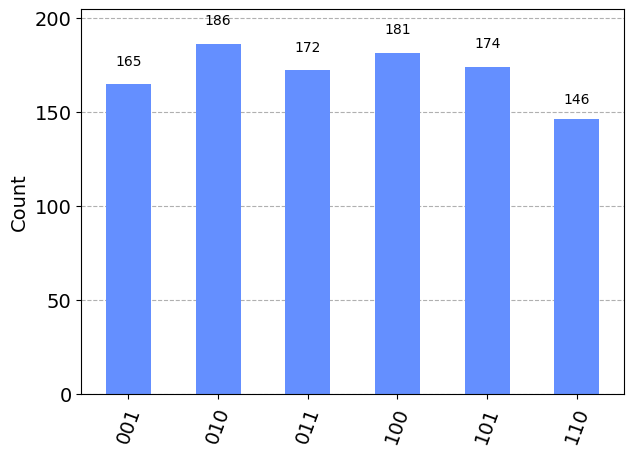

In [37]:
ans = sim_state_exp(qc)
plot_histogram(ans)